In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import warnings
warnings.filterwarnings("ignore")

In [36]:
df=pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [38]:
df['Date'].head(6)

0    6/29/2010
1    6/30/2010
2     7/1/2010
3     7/2/2010
4     7/6/2010
5     7/7/2010
Name: Date, dtype: object

In [39]:
df[['Date']]=df[['Date']].apply(pd.to_datetime)

In [40]:
df['Date'].head()

0   2010-06-29
1   2010-06-30
2   2010-07-01
3   2010-07-02
4   2010-07-06
Name: Date, dtype: datetime64[ns]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [42]:
df.describe()

,Date,Open,High,Low,Close,Volume,Adj Close
count,1692,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,2013-11-06 02:53:37.021276416,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,2012-03-01 18:00:00,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,2013-11-05 12:00:00,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,2015-07-14 06:00:00,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,2017-03-17 00:00:00,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009
std,NaN,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187


# <font color='green'>The prices of Tesla stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

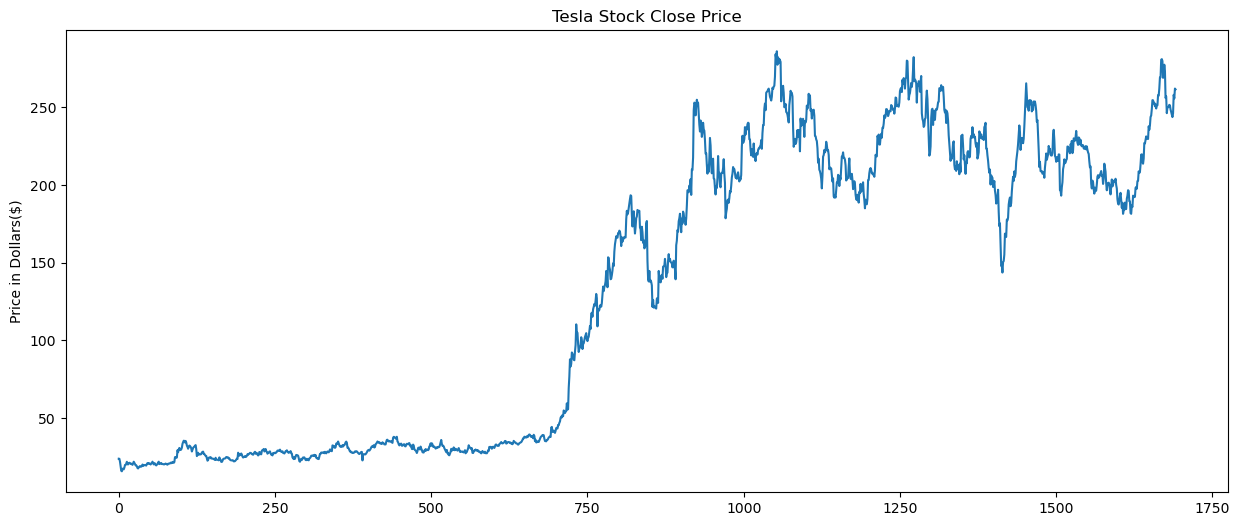

In [43]:
plt.figure(figsize=(15,6))
plt.plot(df['Close'])
plt.title('Tesla Stock Close Price')
plt.ylabel('Price in Dollars($)')
plt.show()

In [44]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


# If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [45]:
df[df['Close']==df['Adj Close']].shape

(1692, 7)

In [46]:
df.shape

(1692, 7)

## <font color=blue>As we can see that the both the columns close and Adj Close contain same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [47]:
df=df.drop(['Adj Close'],axis=1)#axis=1 is used to drop a column and axis=0 is used to drop a row.0 is the by default value of axis

# Before moving further let’s check for the null values if any are present in the data frame.

In [48]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# <font color=green> As we can see there is no null value in the whole data set so we can easily move further 

# Now let’s draw the distribution plot for the continuous features given in the dataset.

In [49]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

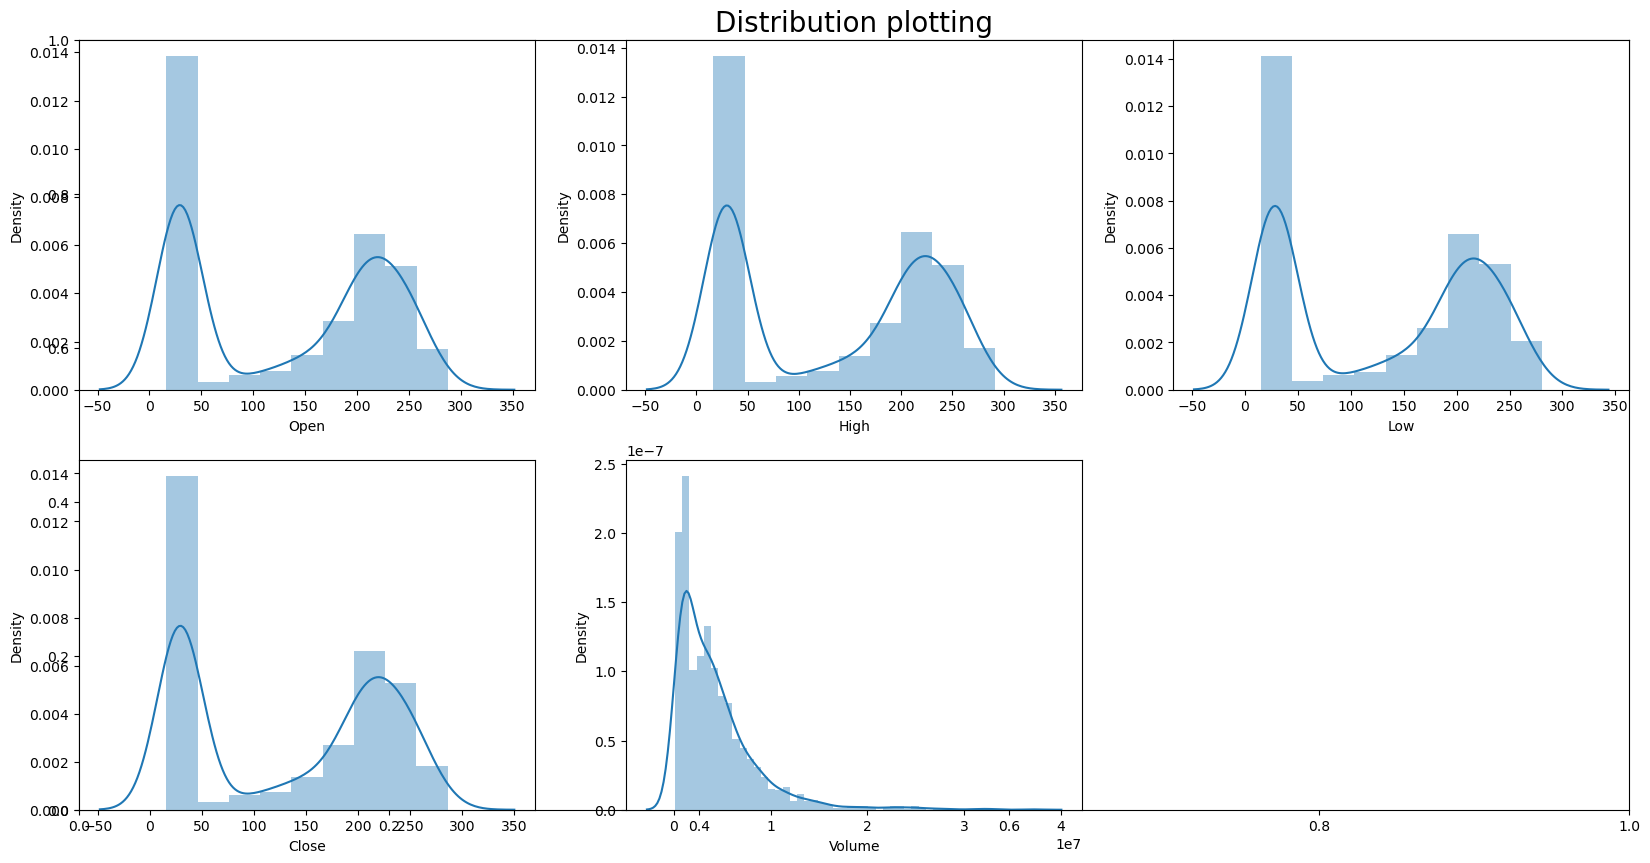

In [50]:
features=['Open','High','Low','Close','Volume']
plt.figure(figsize=(20,10))
plt.title("Distribution plotting",fontsize=20)
for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
plt.show()

## In the distribution plot of Open,High,Low,Close data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

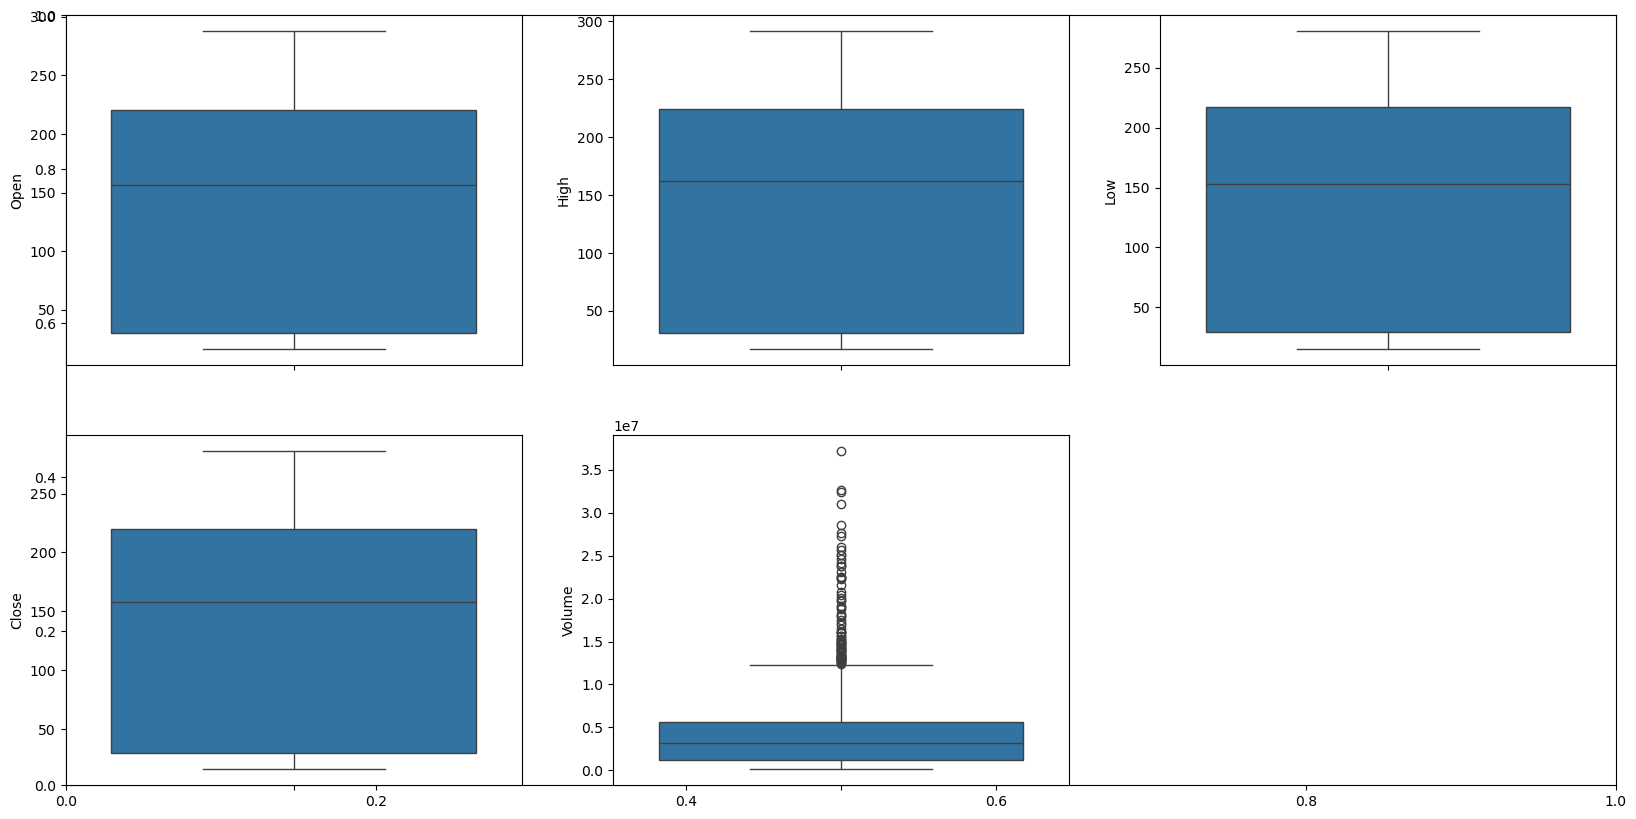

In [51]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

# From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

In [52]:
x=df[['Open','High','Low','Volume']]
y=df[['Close']]

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [56]:
lin_reg.coef_

array([[-5.65525362e-01,  8.58512879e-01,  7.05948797e-01,
        -3.66857025e-08]])

In [57]:
predictions=lin_reg.predict(x_test)

In [58]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [59]:
r2_score(y_test,predictions)

0.9996975717662461

In [60]:
dframe=pd.DataFrame({'actual':np.array(y_test).flatten(),'Predicted':np.array(predictions).flatten()})

In [61]:
dframe.head(10)

,actual,Predicted
0,27.750000,27.891891
1,34.650002,34.469525
2,259.320007,258.523094
3,220.970001,220.840244
4,140.720001,140.880098
5,220.690002,221.632342
6,203.990005,202.882420
7,94.839996,95.254382
8,216.990005,216.381298
9,200.309998,203.728380


# As we can see that the model predicts quite well

Text(0, 0.5, 'Closing price')

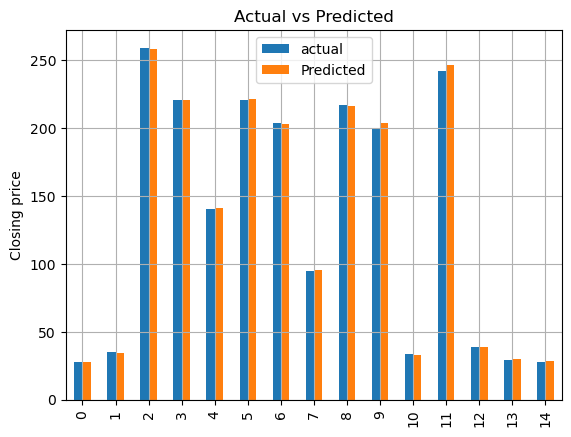

In [62]:
dframe.head(15).plot(kind='bar')
plt.grid()
plt.title('Actual vs Predicted')
plt.ylabel('Closing price')

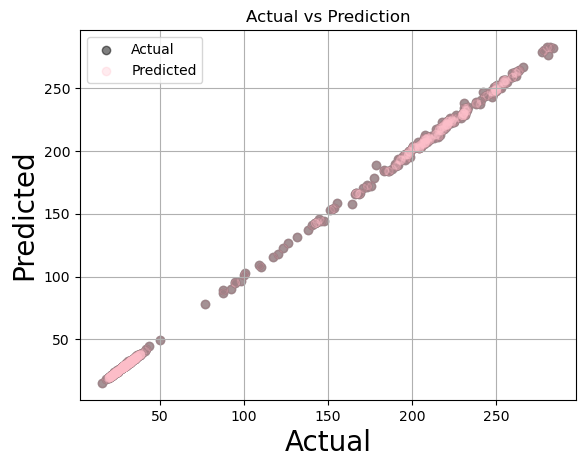

In [63]:
plt.grid()
plt.scatter(y_test, predictions, color='black', label='Actual', alpha=0.5)
plt.scatter(y_test, predictions, color='pink', label='Predicted', alpha=0.3)
plt.title('Actual vs Prediction')
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Predicted', fontsize=20)

plt.legend()

plt.show()


# As we can see that the graphs are almost mixed up because our model has a higher level of accuracy

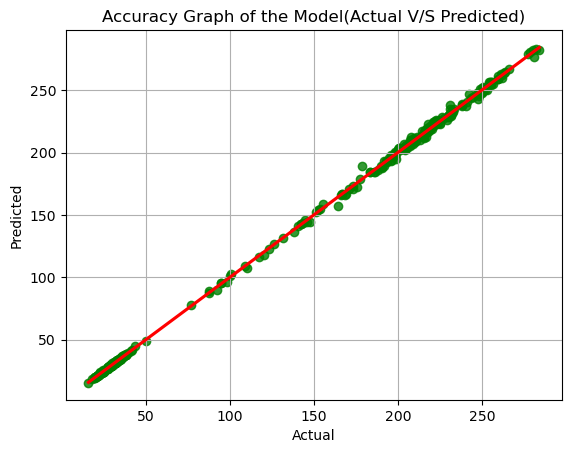

In [64]:
sns.regplot(x=y_test, y=predictions, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})

plt.grid()
plt.title('Accuracy Graph of the Model(Actual V/S Predicted)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## scatter_kws={'color': 'green'}: This parameter sets the color of the scatter plot points to green. These represent the data points (actual vs predicted).<br><br>line_kws={'color': 'red'}: This parameter sets the color of the regression line (fitted line) to red, so it stands out clearly from the green points.

In [65]:
import math
from sklearn import metrics

In [66]:
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,predictions))
print('Mean squared value:',metrics.mean_squared_error(y_test,predictions))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Abs value: 1.049062036481129
Mean squared value: 2.6693133808398954
root mean squared error value: 1.6338033482766203


# Accuracy of the model

In [67]:
accuracy = r2_score(y_test, predictions) * 100
print("The Accuracy of the model is=%.2f%%" % accuracy)

The Accuracy of the model is=99.97%


In [68]:
import joblib
joblib.dump(lin_reg,'stock_predict')

['stock_predict']